In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Standard Units ##

#### Standard units represent data in terms of the average and standard deviation of the data. In order to convert a set of values to standard units, subtract average from each value and then divide by standard deviation. This means that the values represented in standard units are zero'd at the average (when displayed on a chart). Alternatively, we can say that when a set of values is represented in standard units, its mean will be 0 and standard deviation will be 1.

#### However, the distribution of original set of values as well as the ones represented in standar units will look rouhgly the same in a histogram.

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [3]:
def standard_units(x):
    """Convert the array x to standard units"""
    return (x - np.average(x)) / np.std(x)

In [4]:
births = Table.read_table('baby.csv')

In [5]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight',
 'Maternal Smoker')

In [6]:
ages = births.column('Maternal Age')

In [7]:
ages_in_standard_units = standard_units(ages)

In [9]:
# Mean of a set of values represented in standard units is 0 and standard deviation is 1
np.average(ages_in_standard_units), np.std(ages_in_standard_units)

(-7.868020072300939e-17, 1.0)

In [10]:
both = Table().with_column(
    'Age in Years', ages,
    'Age in Standard Units', ages_in_standard_units

)

In [11]:
both

Age in Years,Age in Standard Units
27,-0.0392546
33,0.992496
28,0.132704
23,-0.727088
25,-0.383171
33,0.992496
23,-0.727088
25,-0.383171
30,0.476621
27,-0.0392546


In [12]:
np.mean(ages), np.std(ages)

(27.228279386712096, 5.815360404190897)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


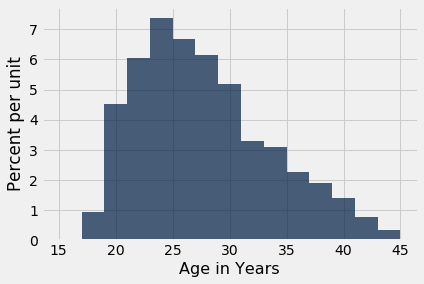

In [13]:
both.hist('Age in Years', bins = np.arange(15, 46, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


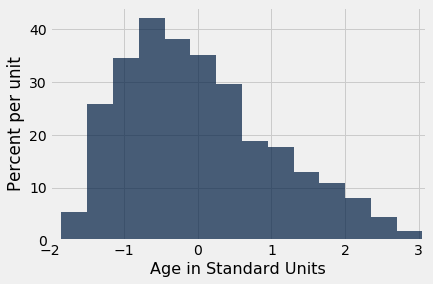

In [14]:
both.hist('Age in Standard Units', bins = np.arange(-2.2, 3.4, 0.35))
plots.xlim(-2, 3.1);

## The SD and Bell Shaped Curves ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


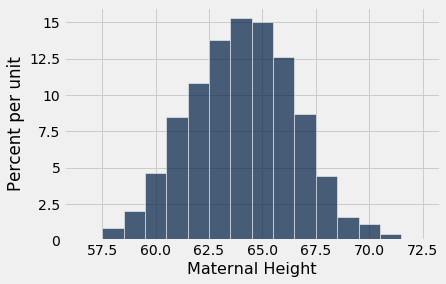

In [15]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1), ec = 'w')

In [16]:
heights = births.column('Maternal Height')
np.average(heights), np.std(heights)

(64.04940374787053, 2.5250254409674375)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


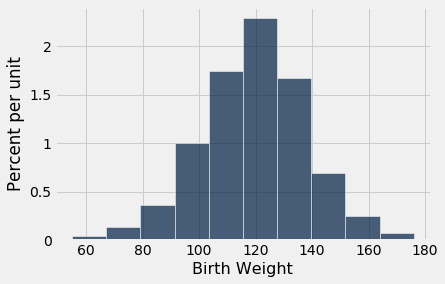

In [17]:
births.hist('Birth Weight', ec = 'w')

In [18]:
bw = births.column('Birth Weight')
np.average(bw), np.std(bw)

(119.46252129471891, 18.32086370220278)

## Central Limit Theorem ##

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

#### We might not always have data (aka population) that looks like a normal curve as a histogram. However, the distribution of a SUM or AVERAGE metric of a random sampling of such data, when taken at random WITH REPLACEMENT, will be normal. ALWAYS TRUE only for SUM and AVERAGE metrics!!

#### More importantly, the MEAN of the randomly sampled values will be very close to the mean of the population! This concept is very powerful when making predictions about a population when we only have a random sample from that population to work with! 

In [19]:
united = Table.read_table('united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


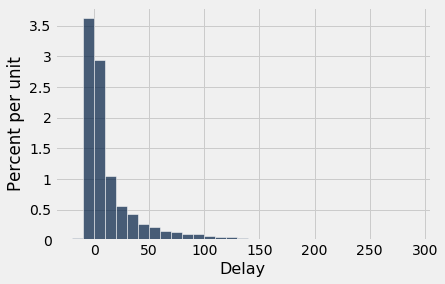

In [20]:
united.hist('Delay', bins = np.arange(-20, 300, 10), ec='w')

In [21]:
sample_size = 500

averages = make_array()

for i in np.arange(10000):
    sampled_flights = united.sample(sample_size) #sample method uses with replacement as default option
    sample_average = np.average(sampled_flights.column('Delay'))
    averages = np.append(averages, sample_average)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


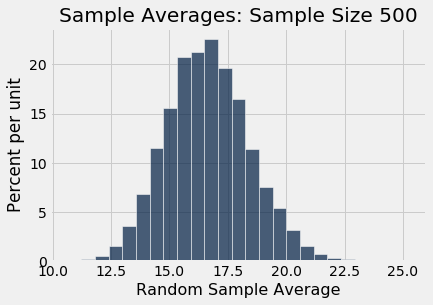

In [22]:
Table().with_column('Sample Average', averages).hist(bins = 25, ec='w')
plots.title('Sample Averages: Sample Size ' + str(sample_size))
plots.xlabel('Random Sample Average');

In [23]:
# Population average
pop_ave = np.average(united.column('Delay'))
pop_ave

16.658155515370705

#### As we just saw, the mean of the randomly drawn samples WITH REPLACEMENT will be very close to the mean of the actual population, even though we might not have the full population available to us. Very powerful for making predictions about a population based on randomly drawn samples from it.